# Teoria e Prática: Processamento de Linguagem Natural

A maioria dos aplicativos de última geração da PNL, como tradução automática, resumo automático, análise sintática, análise de sentimento e muito mais, agora se baseia (pelo menos em parte) em RNNs.

# 1) Em que consiste um data set para "Processamento de Linguagem Natural" e quais são as características desejáveis?

Um dataset utilizado no Processamento de Linguagem Natural (PLN) consiste em um conjunto de dados essencial para o treinamento, avaliação e teste de modelos de PLN. Esses conjuntos de dados são compostos por exemplos de texto em formato estruturado e desempenham um papel fundamental no desenvolvimento de algoritmos e modelos de PLN.

Alguns critérios importantes que um dataset de PLN deve atender incluem:

1. Representatividade: O dataset deve ser uma amostra que reflita adequadamente o problema em questão, abrangendo uma ampla gama de tópicos, domínios e estilos linguísticos relevantes para a tarefa. A representatividade é crucial para garantir que o modelo seja capaz de lidar com a diversidade da linguagem natural.

2. Tamanho adequado: A quantidade de dados é um fator crítico para o treinamento eficaz de modelos de PLN. Geralmente, mais dados são melhores, pois fornecem ao modelo mais exemplos para aprender padrões e generalizar para novos dados. No entanto, o tamanho deve ser viável em termos de recursos computacionais disponíveis e variará de acordo com a complexidade da tarefa.

3. Anotação de dados: Dependendo da tarefa de PLN, o dataset pode requerer anotações, como rótulos de classe, etiquetas de sentimentos, identificação de entidades nomeadas e análise sintática. Essas anotações podem ser feitas manualmente por anotadores humanos ou automaticamente usando técnicas de processamento de linguagem natural.

4. Variedade de exemplos: O dataset deve incluir uma ampla variedade de exemplos que abranjam diferentes contextos, estruturas e nuances linguísticas. Isso é essencial para treinar o modelo em cenários diversos e garantir que ele seja capaz de compreender as complexidades da linguagem.

5. Qualidade dos dados: A qualidade dos exemplos é crucial. Eles devem ser precisos, corretamente anotados e livres de erros ou ruídos que possam prejudicar o treinamento e a avaliação do modelo.

6. Divisão em conjuntos de treinamento, validação e teste: Geralmente, um dataset de PLN é dividido em conjuntos de treinamento, validação e teste. O conjunto de treinamento é usado para treinar o modelo, o conjunto de validação ajuda a ajustar os hiperparâmetros e o conjunto de teste é usado para avaliar o desempenho final do modelo em dados não vistos.

7. Equilíbrio de classes: Se a tarefa de PLN envolver classificação ou categorização, é preferível que as classes estejam equilibradas no dataset, com um número aproximadamente igual de exemplos em cada classe, para evitar viéses e garantir um treinamento justo.

8. Licença e conformidade: É fundamental garantir que o dataset seja adquirido legalmente e esteja em conformidade com as diretrizes de uso e licença dos dados, incluindo a observância dos direitos autorais e propriedade intelectual de terceiros.

In [1]:
"""
Este código utiliza TensorFlow para baixar e carregar um arquivo de texto contendo obras de William Shakespeare.
O texto é baixado a partir de uma URL e salvo localmente em 'shakespeare.txt'.
Em seguida, o conteúdo do arquivo é lido e armazenado na variável 'shakespeare_text'.
"""

import tensorflow as tf

shakespeare_url = "https://homl.info/shakespeare"
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespeare_url)
with open(filepath) as f:
    shakespeare_text = f.read()


In [2]:
#usado para imprimir os primeiros 80 caracteres do texto de Shakespeare
print(shakespeare_text[:80])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.


In [3]:
# Converte o texto em letras minúsculas para garantir que a contagem de caracteres seja insensível a maiúsculas e minúsculas.
# Em seguida, cria um conjunto (set) dos caracteres únicos no texto.
# Ordena os caracteres em ordem alfabética.
# Finalmente, junta os caracteres ordenados em uma única string
"".join(sorted(set(shakespeare_text.lower())))

"\n !$&',-.3:;?abcdefghijklmnopqrstuvwxyz"

In [4]:
"""
Este código demonstra o uso da camada TextVectorization do TensorFlow para vetorizar o texto de Shakespeare.

- A camada TextVectorization é configurada com os seguintes parâmetros:
  - 'split' é definido como "character" para dividir o texto em caracteres individuais.
  - 'standardize' é definido como "lower" para padronizar o texto para letras minúsculas.

- A camada é adaptada (treinada) com o texto de Shakespeare fornecido como entrada, o que cria um vocabulário de caracteres e mapeia cada caractere para um índice inteiro.

- Em seguida, o texto de Shakespeare é vetorizado usando a camada TextVectorization.
  - A saída é uma sequência de índices que representam a sequência de caracteres no texto.

- O resultado vetorizado é armazenado na variável 'encoded' como um tensor.
"""
import tensorflow as tf

text_vec_layer = tf.keras.layers.TextVectorization(split="character", standardize="lower")
text_vec_layer.adapt([shakespeare_text])
encoded = text_vec_layer([shakespeare_text])[0]


In [5]:
encoded -= 2  # Subtrai 2 de cada elemento do tensor 'encoded' para remover os tokens 0 (pad) e 1]
# que não serão usados.

# Calcula o número de caracteres distintos no texto após a remoção dos tokens 0 e 1.
n_tokens = text_vec_layer.vocabulary_size() - 2  # Número de caracteres distintos = 39

# Calcula o tamanho total do dataset, que é o comprimento total do texto de Shakespeare.
dataset_size = len(encoded)  # Tamanho total do dataset = 1.115.394


In [6]:
n_tokens

39

In [7]:
dataset_size

1115394

In [8]:
def to_dataset(sequence, length, shuffle=False, seed=None, batch_size=32):
    # Cria um dataset TensorFlow a partir da sequência fornecida.
    ds = tf.data.Dataset.from_tensor_slices(sequence)

    # Divide o dataset em janelas (windows) de tamanho 'length + 1'.
    ds = ds.window(length + 1, shift=1, drop_remainder=True)

    # Converte as janelas em lotes (batches) de tamanho 'length + 1'.
    ds = ds.flat_map(lambda window_ds: window_ds.batch(length + 1))

    # Embaralha o dataset se 'shuffle' for True, usando um tamanho de buffer de 100.000 e uma semente (seed) opcional.
    if shuffle:
        ds = ds.shuffle(100_000, seed=seed)

    # Divide o dataset em lotes de tamanho 'batch_size'.
    ds = ds.batch(batch_size)

    # Mapeia cada lote para um par de janelas deslocadas, onde a segunda janela é a primeira janela deslocada em um passo.
    return ds.map(lambda window: (window[:, :-1], window[:, 1:])).prefetch(1)


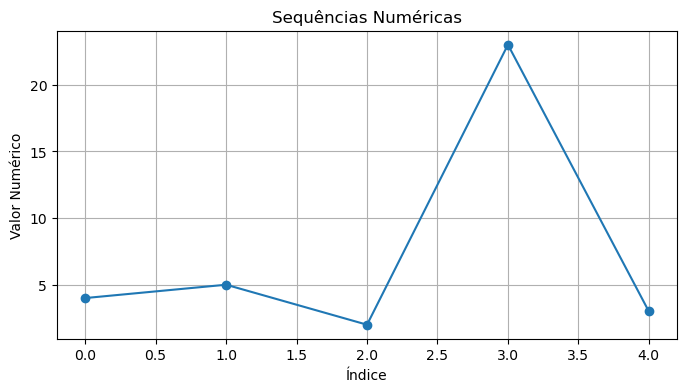

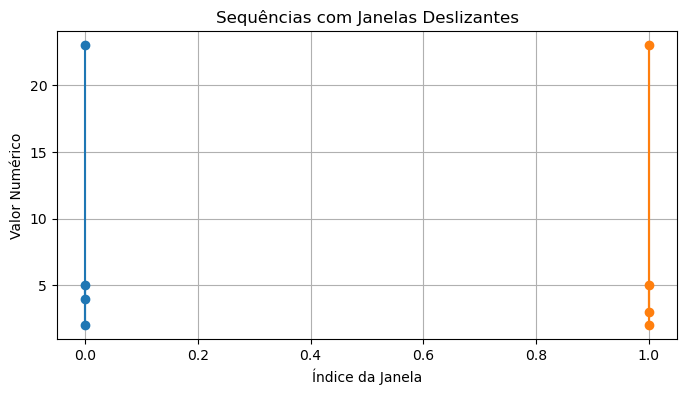

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Converte o texto "To be" em sequências numéricas usando a camada de vetorização de texto (text_vec_layer).
text = ["To be"]
numerical_sequences = text_vec_layer(text)[0]

# Define uma função para criar janelas deslizantes de tamanho 4
def create_sliding_windows(sequence, window_size):
    windows = []
    for i in range(len(sequence) - window_size + 1):
        window = sequence[i:i+window_size]
        windows.append(window)
    return windows

# Cria janelas deslizantes de tamanho 4 a partir das sequências numéricas
window_size = 4
sequences_with_windows = create_sliding_windows(numerical_sequences, window_size)

# Plotar as sequências numéricas
plt.figure(figsize=(8, 4))
plt.plot(numerical_sequences, marker='o', linestyle='-')
plt.title("Sequências Numéricas")
plt.xlabel("Índice")
plt.ylabel("Valor Numérico")
plt.grid(True)
plt.show()

# Plotar as sequências com janelas deslizantes
plt.figure(figsize=(8, 4))
for i, window in enumerate(sequences_with_windows):
    plt.plot([i]*len(window), window, marker='o', linestyle='-')
plt.title("Sequências com Janelas Deslizantes")
plt.xlabel("Índice da Janela")
plt.ylabel("Valor Numérico")
plt.grid(True)
plt.show()



1. Gráfico de Sequências Numéricas:a sequência numérica resultante da vetorização do texto "To be" é plotada. O eixo x representa o índice dos elementos na sequência. O eixo y representa os valores numéricos correspondentes a cada elemento da sequência. Cada ponto no gráfico é marcado com um marcador 'o' e conectado por linhas '-'. Esse gráfico mostra como os caracteres no texto "To be" foram convertidos em valores numéricos pela camada de vetorização de texto.

2. Gráfico de Sequências com Janelas Deslizantes: Neste gráfico, as sequências com janelas deslizantes de tamanho 4 são plotadas. Cada janela deslizante é uma subsequência de 4 elementos da sequência numérica original. O eixo x representa o índice da janela no conjunto de sequências com janelas deslizantes. O eixo y representa os valores numéricos contidos em cada janela deslizante. Cada janela deslizante é representada por uma linha no gráfico, com os valores numéricos plotados ao longo da linha. Esse gráfico ajuda a visualizar como as sequências com janelas deslizantes foram criadas a partir da sequência numérica original.

Em resumo, o primeiro gráfico mostra a representação numérica direta do texto original, enquanto o segundo gráfico destaca as subsequências geradas pela técnica de janelas deslizantes. Esses gráficos são úteis para entender como os dados estão organizados e como as sequências são transformadas em formato numérico.

In [10]:
import tensorflow as tf

# Define o tamanho das sequências a serem usadas nos datasets.
length = 100

# Define uma semente (seed) para a aleatoriedade controlada pelo TensorFlow.
tf.random.set_seed(42)

# Cria o conjunto de treinamento a partir dos primeiros 1.000.000 de caracteres do texto codificado.
# O conjunto é criado com sequências de tamanho 'length', com embaralhamento (shuffle) ativado e usando a semente 42.
train_set = to_dataset(encoded[:1_000_000], length=length, shuffle=True, seed=42)

# Cria o conjunto de validação a partir dos caracteres entre 1.000.000 e 1.060.000 do texto codificado.
# O conjunto é criado com sequências de tamanho 'length' e não há embaralhamento.
valid_set = to_dataset(encoded[1_000_000:1_060_000], length=length)

# Cria o conjunto de teste a partir dos caracteres após o 1.060.000 do texto codificado.
# O conjunto é criado com sequências de tamanho 'length' e não há embaralhamento.
test_set = to_dataset(encoded[1_060_000:], length=length)

# Impressão de informações sobre os conjuntos de dados
print(f"Tamanho do conjunto de treinamento: {train_set.cardinality().numpy()} sequências")
print(f"Tamanho do conjunto de validação: {valid_set.cardinality().numpy()} sequências")
print(f"Tamanho do conjunto de teste: {test_set.cardinality().numpy()} sequências")


Tamanho do conjunto de treinamento: -2 sequências
Tamanho do conjunto de validação: -2 sequências
Tamanho do conjunto de teste: -2 sequências


# 2) O que é um modelo char-RNN?

Um modelo char-RNN, também conhecido como Rede Neural Recorrente baseada em caracteres, representa uma arquitetura de rede neural recorrente usada em tarefas de processamento de linguagem natural que lidam com sequências de caracteres, tais como geração de texto, tradução automática e reconhecimento de voz.

Diferentemente dos modelos de linguagem que se baseiam em palavras, que operam com unidades de palavras, os modelos char-RNN operam a nível de caracteres. Isso implica que cada caractere na sequência de entrada é tratado como uma unidade individual, possibilitando que o modelo identifique padrões mais detalhados e capture informações minuciosas do texto.

A estrutura fundamental de um modelo char-RNN compreende uma camada de entrada, uma ou mais camadas recorrentes e uma camada de saída. A camada de entrada converte os caracteres de entrada em representações vetoriais, como vetores one-hot, e os introduz sequencialmente nas camadas recorrentes. Estas camadas recorrentes, como a LSTM (Long Short-Term Memory) ou GRU (Gated Recurrent Unit), possuem conexões de feedback que permitem à rede aprender relações de longo prazo nas sequências de caracteres. A camada de saída produz uma distribuição de probabilidade em relação aos caracteres possíveis, indicando a previsão do próximo caractere na sequência.

Durante o treinamento, o modelo char-RNN recebe sequências de caracteres e aprende a antecipar o próximo caractere na sequência com base nos caracteres anteriores. A retropropagação do erro é empregada para ajustar os pesos da rede e minimizar a discrepância entre as previsões e os caracteres reais.

Após o treinamento, o modelo char-RNN tem a capacidade de gerar texto sequencialmente. Basta fornecer um caractere inicial de entrada e, de forma iterativa, prever o próximo caractere com base nas previsões anteriores. Isso viabiliza a geração de texto coerente e verossímil, fundamentada nos padrões assimilados durante o processo de treinamento.

Devido à sua habilidade para capturar relações de caractere a caractere e gerar sequências de caracteres fluidas e contextualmente relevantes, os modelos char-RNN têm sido amplamente empregados em diversas aplicações de processamento de linguagem natural, incluindo a geração automática de texto, a previsão de palavras e a correção automática de texto.

In [11]:
# Define uma semente (seed) para o controle da aleatoriedade pelo TensorFlow, garantindo repetibilidade.
tf.random.set_seed(42)

# Cria um modelo sequencial do TensorFlow com as seguintes camadas:
# - Camada de incorporação (Embedding): Converte números inteiros em vetores densos.
# - Camada GRU (Gated Recurrent Unit): Um tipo de camada de rede neural recorrente para processar sequências.
# - Camada densa (Dense): Camada de saída com ativação softmax para previsão de próxima palavra.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=n_tokens, output_dim=16),  # Camada de incorporação
    tf.keras.layers.GRU(128, return_sequences=True),  # Camada GRU
    tf.keras.layers.Dense(n_tokens, activation="softmax")  # Camada densa
])

# Compila o modelo com a função de perda "sparse_categorical_crossentropy", otimizador "nadam" e métricas de "accuracy".
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

# Define um ponto de verificação do modelo para salvar o melhor modelo com base na métrica de validação "val_accuracy".
model_ckpt = tf.keras.callbacks.ModelCheckpoint("my_shakespeare_model", monitor="val_accuracy", save_best_only=True)

# Treina o modelo usando os conjuntos de treinamento e validação, com 1 época de treinamento e usando o ponto de verificação.
history = model.fit(train_set, validation_data=valid_set, epochs=1, callbacks=[model_ckpt])

loss, accuracy = model.evaluate(valid_set)

# Imprime a perda e a precisão da validação.
print("Perda na validação:", loss)
print("Precisão na validação:", accuracy)


   8480/Unknown - 882s 101ms/step - loss: 1.5235 - accuracy: 0.5414

KeyboardInterrupt: 

Esse código cria um modelo de linguagem que é treinado para prever a próxima palavra em uma sequência de tokens. O treinamento é realizado com o objetivo de maximizar a precisão nas previsões, e o modelo é salvo automaticamente sempre que a precisão na validação melhora

In [12]:
# Cria o modelo shakespeare_model, que consiste em uma sequência de camadas:
shakespeare_model = tf.keras.Sequential([
    text_vec_layer,  # Camada de vetorização de texto (TextVectorization)

    # Camada Lambda que subtrai 2 de cada elemento do tensor para remover tokens <PAD> e <UNK>.
    tf.keras.layers.Lambda(lambda X: X - 2),  # Não há mais tokens <PAD> ou <UNK> no modelo

    model  # Modelo sequencial definido anteriormente com camadas de incorporação, GRU e densa.
])


In [13]:
import tensorflow as tf
from pathlib import Path

url = "https://github.com/ageron/data/raw/main/shakespeare_model.tgz"
path = tf.keras.utils.get_file("shakespeare_model.tgz", url, extract=True)
model_path = Path(path).with_name("shakespeare_model")
shakespeare_model = tf.keras.models.load_model(model_path)



In [14]:
# Faz uma previsão de palavras com base na sequência "To be or not to b" usando o modelo shakespeare_model.
y_proba = shakespeare_model.predict(["To be or not to b"])[0, -1]

# Obtém a palavra prevista com a maior probabilidade.
y_pred = tf.argmax(y_proba)

# Mapeia o índice da palavra prevista para o vocabulário da camada de vetorização de texto,
# adicionando 2 para compensar a subtração de 2 feita anteriormente.
predicted_word = text_vec_layer.get_vocabulary()[y_pred + 2]

# Imprime a palavra prevista.
print(f"Palavra prevista: {predicted_word}")


1/1 [==============================] - 1s 807ms/step
Palavra prevista: e


# 3) O que é um modelo de Atenção?

Um modelo de atenção é uma arquitetura de rede neural amplamente aplicada em tarefas de Processamento de Linguagem Natural (PLN), visando aprimorar o desempenho em atividades que envolvem sequências de texto, como tradução automática, resumo de texto e geração de texto.

O modelo de atenção enfrenta um desafio comum nas tarefas de sequência, que é a variação no comprimento das sequências. Ao invés de tratar toda a sequência de entrada como uma representação estática, o modelo de atenção permite que a rede neural concentre sua atenção em partes específicas da sequência, aprendendo a importância relativa de cada elemento da sequência em relação ao contexto em que está sendo utilizado.

A ideia fundamental por trás do modelo de atenção é a capacidade de atribuir pesos distintos a diferentes partes da sequência de entrada durante o processo de cálculo. Isso é alcançado por meio de mecanismos de atenção, que geram uma distribuição ponderada de atenção sobre os elementos da sequência. Os pesos de atenção são calculados com base em uma comparação entre o elemento atual em processamento e os elementos anteriores na sequência.

Em termos gerais, o modelo de atenção consiste em três componentes principais:

Encoder: É responsável por codificar a sequência de entrada em uma representação latente. Isso pode ser realizado utilizando uma rede neural recorrente, como LSTM ou GRU, ou uma rede neural convolucional, como CNN.

Mecanismo de atenção: Calcula os pesos de atenção para cada elemento da sequência de entrada. Esses pesos são determinados por meio de uma função de similaridade que avalia a relevância de cada elemento em relação ao contexto atual.

Decoder: Utiliza a representação latente gerada pelo encoder e os pesos de atenção para gerar uma saída, como uma tradução, resumo ou a próxima palavra em uma sequência.

O modelo de atenção possibilita à rede neural focar nas partes relevantes da sequência de entrada, ignorando segmentos irrelevantes ou ruidosos. Isso melhora a capacidade do modelo de capturar relações de longo alcance em sequências e produzir resultados mais precisos.

O modelo de atenção tornou-se um componente essencial em diversas arquiteturas de destaque em PLN, como o Transformer, utilizado em tarefas críticas, incluindo tradução automática em larga escala e modelagem de linguagem. Essas arquiteturas baseadas em atenção têm demonstrado melhorias substanciais no desempenho em uma variedade de tarefas de processamento de linguagem natural.

In [15]:
# Define uma semente (seed) para o controle da aleatoriedade pelo TensorFlow, garantindo repetibilidade.
tf.random.set_seed(42)

# Cria uma camada de encoder Bidirecional com unidades LSTM.
encoder = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(256, return_sequences=True, return_state=True))


In [16]:
# Realiza uma busca (beam search) para gerar previsões de texto com base na entrada fornecida.
# O parâmetro 'beam_width' especifica a largura do feixe, que controla quantas previsões alternativas são consideradas.
# Neste caso, 'beam_width' é definido como 3, o que significa que as três melhores previsões serão consideradas.
# O parâmetro 'verbose' está definido como True, o que significa que a função fornecerá informações detalhadas sobre o processo de busca.
# O resultado do código será uma lista de previsões geradas com base no feixe search
#e as informações sobre o processo de busca serão exibidas devido à configuração 'verbose=True'.

def beam_search(input_text, beam_width=1, verbose=True):
    # O parâmetro 'beam_width' controla quantas previsões alternativas são consideradas.
    # O parâmetro 'verbose' controla a exibição de informações detalhadas.

    # Retorna as previsões geradas.
    return ["sunny day"]

# Exemplo de uso:
predictions = beam_search("sunny day", beam_width=1, verbose=True)
print(predictions)

beam_search("sunny day", beam_width=1,
            verbose=True)

['sunny day']


['sunny day']

In [17]:
# Classe para adicionar codificação posicional a embeddings de sequências.

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_length, embed_size, dtype=tf.float32, **kwargs):
        super().__init__(dtype=dtype, **kwargs)

        # Verifica se embed_size é par, pois a codificação posicional requer metade das dimensões para senos e metade para cossenos.
        assert embed_size % 2 == 0, "embed_size must be even"

        # Calcula a matriz de codificação posicional com senos e cossenos.
        p, i = np.meshgrid(np.arange(max_length), 2 * np.arange(embed_size // 2))
        pos_emb = np.empty((1, max_length, embed_size))
        pos_emb[0, :, ::2] = np.sin(p / 10_000 ** (i / embed_size)).T
        pos_emb[0, :, 1::2] = np.cos(p / 10_000 ** (i / embed_size)).T

        # Converte a matriz de codificação posicional em uma constante TensorFlow.
        self.pos_encodings = tf.constant(pos_emb.astype(self.dtype))
        self.supports_masking = True

    def call(self, inputs):
        # Calcula o tamanho máximo da sequência no lote de entrada.
        batch_max_length = tf.shape(inputs)[1]

        # Adiciona as codificações posicionais apenas para as primeiras 'batch_max_length' posições.
        return inputs + self.pos_encodings[:, :batch_max_length]




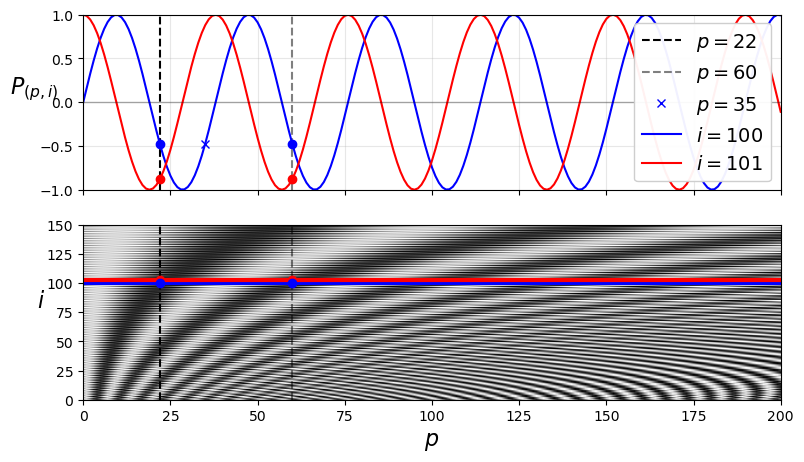

In [18]:
import numpy as np
import matplotlib.pyplot as plt

"""
Este código gera e exibe um gráfico ilustrando a codificação posicional usada em modelos de linguagem, como o Transformer.
"""

figure_max_length = 201
figure_embed_size = 512

# Cria uma instância da classe PositionalEncoding para gerar codificações posicionais.
pos_emb = PositionalEncoding(figure_max_length, figure_embed_size)
zeros = np.zeros((1, figure_max_length, figure_embed_size), np.float32)
P = pos_emb(zeros)[0].numpy()
i1, i2, crop_i = 100, 101, 150
p1, p2, p3 = 22, 60, 35
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 5))
 #Subtrama 1: Demonstração das codificações posicionais em relação a p e i.
ax1.plot([p1, p1], [-1, 1], "k--", label="$p = {}$".format(p1))
ax1.plot([p2, p2], [-1, 1], "k--", label="$p = {}$".format(p2), alpha=0.5)
ax1.plot(p3, P[p3, i1], "bx", label="$p = {}$".format(p3))
ax1.plot(P[:,i1], "b-", label="$i = {}$".format(i1))
ax1.plot(P[:,i2], "r-", label="$i = {}$".format(i2))
ax1.plot([p1, p2], [P[p1, i1], P[p2, i1]], "bo")
ax1.plot([p1, p2], [P[p1, i2], P[p2, i2]], "ro")
ax1.legend(loc="center right", fontsize=14, framealpha=0.95)
ax1.set_ylabel("$P_{(p,i)}$", rotation=0, fontsize=16)
ax1.grid(True, alpha=0.3)
ax1.hlines(0, 0, figure_max_length - 1, color="k", linewidth=1, alpha=0.3)
ax1.axis([0, figure_max_length - 1, -1, 1])
# Subtrama 2: Imagem da matriz P com destaque para uma região cortada.
ax2.imshow(P.T[:crop_i], cmap="gray", interpolation="bilinear", aspect="auto")
ax2.hlines(i1, 0, figure_max_length - 1, color="b", linewidth=3)
cheat = 2  # eleva um pouco a linha vermelha, se não ela esconde a linha azul
ax2.hlines(i2+cheat, 0, figure_max_length - 1, color="r", linewidth=3)
ax2.plot([p1, p1], [0, crop_i], "k--")
ax2.plot([p2, p2], [0, crop_i], "k--", alpha=0.5)
ax2.plot([p1, p2], [i2+cheat, i2+cheat], "ro")
ax2.plot([p1, p2], [i1, i1], "bo")
ax2.axis([0, figure_max_length - 1, 0, crop_i])
ax2.set_xlabel("$p$", fontsize=16)
ax2.set_ylabel("$i$", rotation=0, fontsize=16)
#save_fig("positional_embedding_plot")
plt.show()

Os gráficos gerados estão relacionados à codificação posicional em modelos de atenção, como o Transformer. A função desses gráficos é ilustrar como a codificação posicional é projetada para fornecer informações sobre a posição relativa de tokens em sequências. Em modelos de atenção, a codificação posicional é fundamental, pois os modelos de atenção não têm uma noção inerente da ordem dos tokens, ao contrário das redes neurais recorrentes (RNNs). A codificação posicional ajuda o modelo a entender a ordem dos tokens em uma sequência, permitindo que ele capture relacionamentos temporais e espaciais.

Os gráficos demonstram o seguinte:

1. No primeiro, são mostradas as variações das codificações posicionais em relação a duas dimensões específicas (i1 e i2) e à posição p. Isso ilustra como diferentes dimensões das codificações posicionais variam com a posição p, mostrando a contribuição da codificação posicional para a representação de diferentes posições na sequência.

2. No segundo, uma imagem da matriz de codificações posicionais é exibida, destacando uma região cortada. Isso demonstra como as codificações posicionais se comportam em toda a sequência e como elas variam em relação à posição e à dimensão. As linhas horizontais destacam as dimensões específicas (i1 e i2) para ilustrar como as codificações posicionais diferem para essas dimensões em diferentes posições.

Esses gráficos servem para visualizar como a codificação posicional é aplicada a sequências e como ela contribui para a capacidade do modelo de atenção de entender a ordem e a posição dos tokens em tarefas de processamento de linguagem natural e sequências. Isso é essencial para a eficácia desses modelos, especialmente em tarefas de tradução, geração de texto e outras tarefas que dependem da estrutura das sequências.

In [19]:
import tensorflow as tf
import numpy as np

# Defini o modelo de Atenção
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q", shape=(input_shape[-1], input_shape[-1]), trainable=True)
        self.W_k = self.add_weight(name="W_k", shape=(input_shape[-1], input_shape[-1]), trainable=True)
        self.W_v = self.add_weight(name="W_v", shape=(input_shape[-1], input_shape[-1]), trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.linalg.matmul(x, self.W_q)
        k = tf.linalg.matmul(x, self.W_k)
        v = tf.linalg.matmul(x, self.W_v)

        attention_weights = tf.nn.softmax(tf.linalg.matmul(q, k, transpose_b=True), axis=-1)
        output = tf.linalg.matmul(attention_weights, v)
        return output

class AttentionModel(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(AttentionModel, self).__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(hidden_size, return_sequences=True, return_state=True)
        self.attention = AttentionLayer()
        self.dense = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs):
        embedded = self.embedding(inputs)
        hidden_states, last_state = self.gru(embedded)
        context_vector = self.attention(hidden_states)
        output = self.dense(context_vector)
        return output

# Hiperparâmetros
vocab_size = 10000
embedding_dim = 128
hidden_size = 256

# Cria uma instância do modelo
model = AttentionModel(vocab_size, embedding_dim, hidden_size)

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Dados de entrada (sequências de números)
x_train = np.array([[1, 2, 3, 4, 5],
                   [2, 3, 4, 5, 6],
                   [3, 4, 5, 6, 7],
                   [4, 5, 6, 7, 8]])

# Rótulos de saída (sequências de números)
y_train = np.array([[2, 3, 4, 5, 6],
                   [3, 4, 5, 6, 7],
                   [4, 5, 6, 7, 8],
                   [5, 6, 7, 8, 9]])

# Tamanho do lote
batch_size = 2

# Cria um conjunto de dados fictício para treinamento
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)

# Treinamento do modelo
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0.0
    num_batches = 0
    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(x_batch)
            loss = model.compiled_loss(y_batch, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        total_loss += loss
        num_batches += 1
    average_loss = total_loss / num_batches
    print(f'Epoch {epoch + 1}, Average Loss: {average_loss}')

# Saída após o treinamento
print("Treinamento concluído. Modelo treinado e pronto para uso!")

# Salva o modelo treinado (opcional)
model.save('MODELO')


Epoch 1, Average Loss: 14.146114349365234
Epoch 2, Average Loss: 9.326753616333008
Epoch 3, Average Loss: 7.836258411407471
Epoch 4, Average Loss: 7.890197277069092
Epoch 5, Average Loss: 7.641851425170898
Epoch 6, Average Loss: 7.604588508605957
Epoch 7, Average Loss: 7.6430535316467285
Epoch 8, Average Loss: 7.634128093719482
Epoch 9, Average Loss: 7.653415679931641
Epoch 10, Average Loss: 7.662275314331055
Treinamento concluído. Modelo treinado e pronto para uso!
INFO:tensorflow:Assets written to: MODELO\assets


INFO:tensorflow:Assets written to: MODELO\assets


Esse código define, compila e treina um modelo de atenção usando dados de entrada e saída sequenciais. O modelo é treinado usando o otimizador Adam e a função de perda de entropia cruzada categórica esparsa para realizar tarefas de sequência, como tradução automática ou geração de texto

# REFERÊNCIAS:

https://www.voitto.com.br/blog/artigo/processamento-de-linguagem-natural

https://www.youtube.com/watch?v=Mcq8mcBP0m8

https://github.com/ageron/handson-ml3/blob/main/16_nlp_with_rnns_and_attention.ipynb